In [2]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import earthpy as et

from constants import *

In [5]:
## bring in sierra nevada range
path = os.path.join("/users/marianne/documents/data/hucs-stanford_8", "sr396hp9621.shp")
huc = gpd.read_file(path)
# eco_bound[eco_bound['US_L3CODE']=='7']
# sn = eco_bound[eco_bound['US_L3CODE']=='5']

## import the sierra nevada as a shape file and clip
path = os.path.join(data_dir, "reg9_eco_l3", "reg9_eco_l3.shp")
eco_bound = gpd.read_file(path)
eco_bound[eco_bound['US_L3CODE']=='7']
sn = eco_bound[eco_bound['US_L3CODE']=='5']
sn_trans = sn.to_crs(huc.crs)

In [6]:
ids = [list(filter(lambda x: i in x,huc['name'])) for i in names]
shapes = pd.DataFrame(
    [names[i],[huc['geometry'][huc['name']==a] for a in n]] for i,n in enumerate(ids))
import itertools
ids_flat = list(itertools.chain(*ids))

<AxesSubplot:>

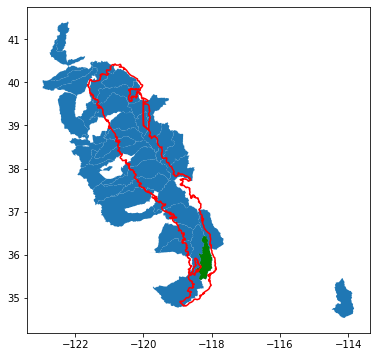

In [7]:
f,ax=plt.subplots(figsize=(10,6))
huc[[i in ids_flat for i in huc['name']]].plot(ax=ax)

huc[huc['name']=='South Fork Kern'].plot(ax=ax,color='green')
# huc[41:42].plot(ax=ax,color='gray')
sn_trans.boundary.plot(ax=ax,color='r')

<AxesSubplot:>

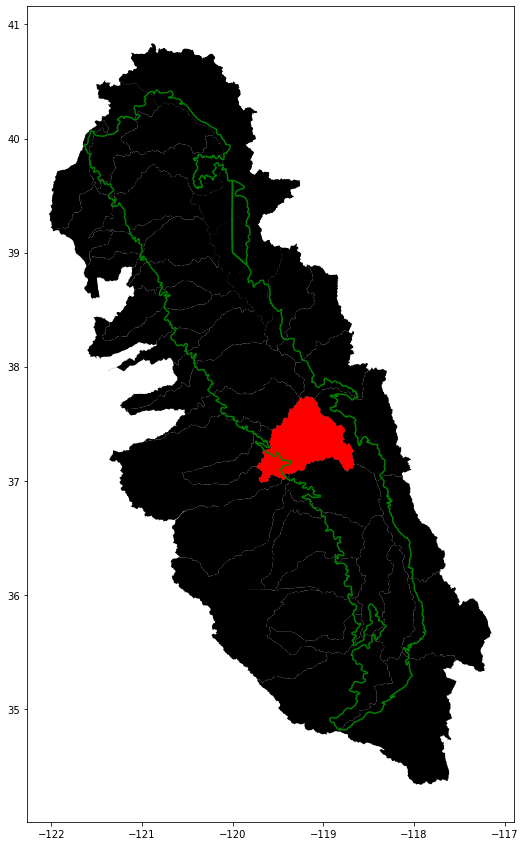

In [8]:
from rasterio.plot import plotting_extent
fig,ax = plt.subplots(figsize=(10,15))
# huc.plot(ax=ax)
sn_trans.boundary.plot(ax=ax,color="green")

#huc[huc['name']=='South Fork Kern'].plot(ax=ax,color='green')
sn_huc8 = gpd.sjoin(huc,sn_trans, how ='inner',op='intersects')
sn_huc8.plot(ax=ax,color='k')
sn_huc8[sn_huc8['name']=='Upper San Joaquin'].plot(ax=ax,color='red')